# Obtaining and Exploring the Data

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data
df_raw = pd.read_csv("listings.csv")

In [ ]:
# Getting an overview of the dataset
print(df_raw.head())

for col in df_raw.columns:
    print(col)

# Preprocessing the Data

Unfortunately, this data set lacks important information such as the number of rooms or the size of the apartment. Therefore, the only relevant information is the district and the price.

In [ ]:
# Deciding which columns to keep
columns_to_keep = ["neighbourhood", "price"]

df = df_raw[columns_to_keep]

# Renaming "neighbourhood" to "district"
df = df.rename(columns={"neighbourhood": "district"})

print(df.head())

Currently the price is given monthly. For a better understanding of possible rental costs, I multiplied the cost times 30.</br>
</br>
Note that these numbers do not represent the normal rental cost of the property in question, as Airbnb apartments and hotel rooms typically cost more than if you were renting the property.

In [ ]:
# Adding column "montly_price" to the dataframe
df["monthly_price"] = df["price"] * 30

print(df.head())

In [ ]:
# Printing a list of all the districts included in the dataframe
print(df["district"].unique())
print(df.nunique())

There are 25 different district included in the datasets. This should be more than enough for a good comparison.

The dataset showed some outliers, that's why I removed the top 25% of the "montly_price" column.

In [ ]:
q3  = df["monthly_price"].quantile(0.75)

new_df = df[(df["monthly_price"] < q3)]

### Visualization of the Data

The visualization shows that the cost for apartments near the center, like Ludwigvorstadt-Isarvorstadt, Maxvorstadt or Altstadt-Lehel, are the highest in average.</br>
Districts like Tudering-Riem, Schwabing-West and Milbertshofen-Am Hart have the widest price ranges.

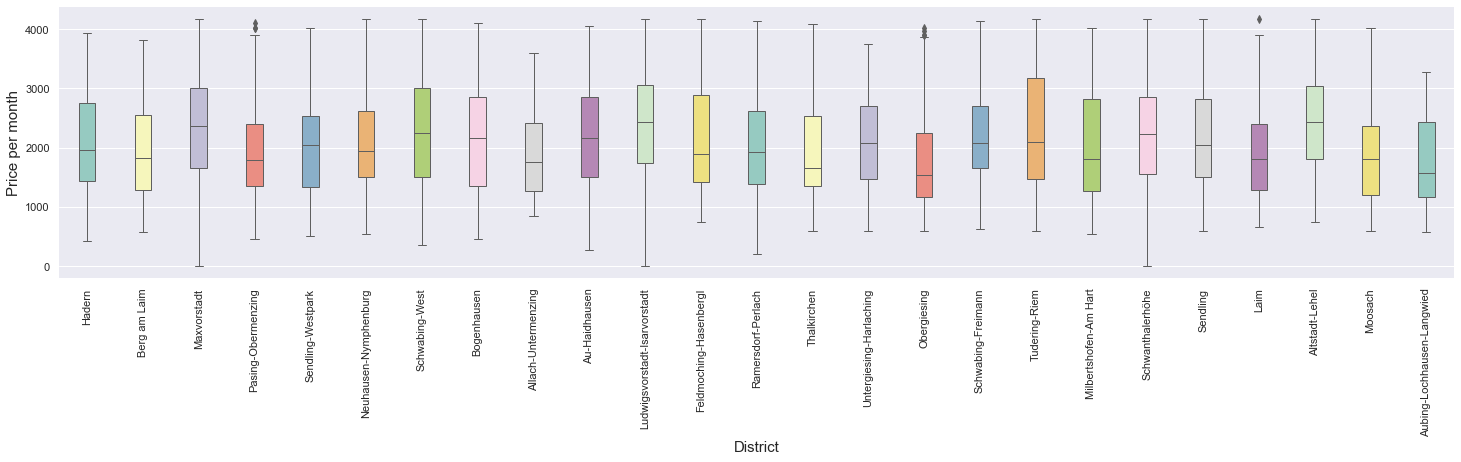

In [28]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 5))

sns.boxplot(x="district", y="monthly_price", palette="Set3", linewidth=1, width=0.3, data=new_df)
sns.despine(left=True, bottom=True)
plt.xlabel("District", size=15)
plt.ylabel("Price per month", size=15)
plt.xticks(rotation=90)

plt.show()